In [1]:
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
img1=cv2.imread('test1.jfif')

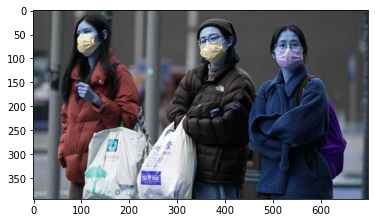

In [4]:
plt.imshow(np.squeeze(img1))

In [5]:
labels_dict={0:'NO',1:'YES'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [6]:
model=load_model('MaskModel.h5')

[[2.6641144e-06 9.9999738e-01]]
1
[[0.06056122 0.9394388 ]]
1
[[7.1717252e-05 9.9992824e-01]]
1


True

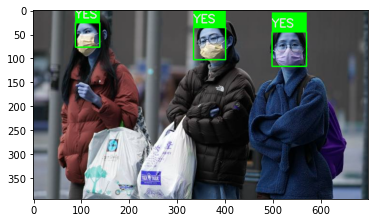

In [11]:
faces=face_cascade.detectMultiScale(img1,1.1,4)
for x,y,w,h in faces:
    face_img=img1[y:y+h,x:x+w]
    resize=cv2.resize(face_img,(224,224))
    resize=resize/255.0
    reshape=np.reshape(resize,(1,224,224,3))
    result=model.predict(reshape)
    print(result)
    label=np.argmax(result[0])
    print(label)
    cv2.rectangle(img1,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(img1,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(img1,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(225,225,225),2)

plt.imshow(np.squeeze(img1))
cv2.imwrite('result1.jpg',img1)

In [15]:
img2=cv2.imread('test2.jpg')

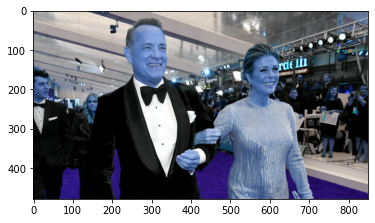

In [16]:
plt.imshow(np.squeeze(img2))

[[2.7385948e-04 9.9972612e-01]]
1
[[7.3354922e-06 9.9999261e-01]]
1
[[1.854759e-05 9.999814e-01]]
1
[[9.2512028e-07 9.9999905e-01]]
1
[[1.2563299e-06 9.9999869e-01]]
1
[[1.307846e-06 9.999987e-01]]
1


True

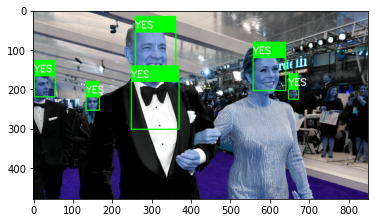

In [17]:
faces=face_cascade.detectMultiScale(img2,1.1,4)
for x,y,w,h in faces:
    face_img=img2[y:y+h,x:x+w]
    resize=cv2.resize(face_img,(224,224))
    resize=resize/255.0
    reshape=np.reshape(resize,(1,224,224,3))
    result=model.predict(reshape)
    print(result)
    label=np.argmax(result[0])
    print(label)
    
    cv2.rectangle(img2,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(img2,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(img2,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(225,225,225),2)

plt.imshow(np.squeeze(img2))
cv2.imwrite('result2.jpg',img2)